In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
# Create DataFrame
df = pd.read_csv('data.csv')

In [4]:
# Find rows with null values
rows_with_nulls = df[df.isnull().any(axis=1)].index.tolist()

print("Row numbers with null values:")
print(rows_with_nulls)

Row numbers with null values:
[]


In [5]:
# Initialize the graph
G = nx.Graph()

# Add nodes and edges
for _, row in df.iterrows():
    product = row['Product']
    plant = row['Plant']
    storage = row['Storage Location']

    # Add nodes with type attribute
    G.add_node(product, type='Product')
    G.add_node(plant, type='Plant')
    G.add_node(storage, type='Storage Location')

    # Add edges with type attribute
    G.add_edge(product, plant, type='Product-Plant')
    G.add_edge(product, storage, type='Product-Storage Location')

# Define node shapes and edge styles
node_shapes = {'Product': 'o', 'Plant': 's', 'Storage Location': '^'}
edge_styles = {'Product-Plant': 'solid', 'Product-Storage Location': 'dashed'}
node_colors = {'Product': 'bisque', 'Plant': 'cyan', 'Storage Location': 'plum'}

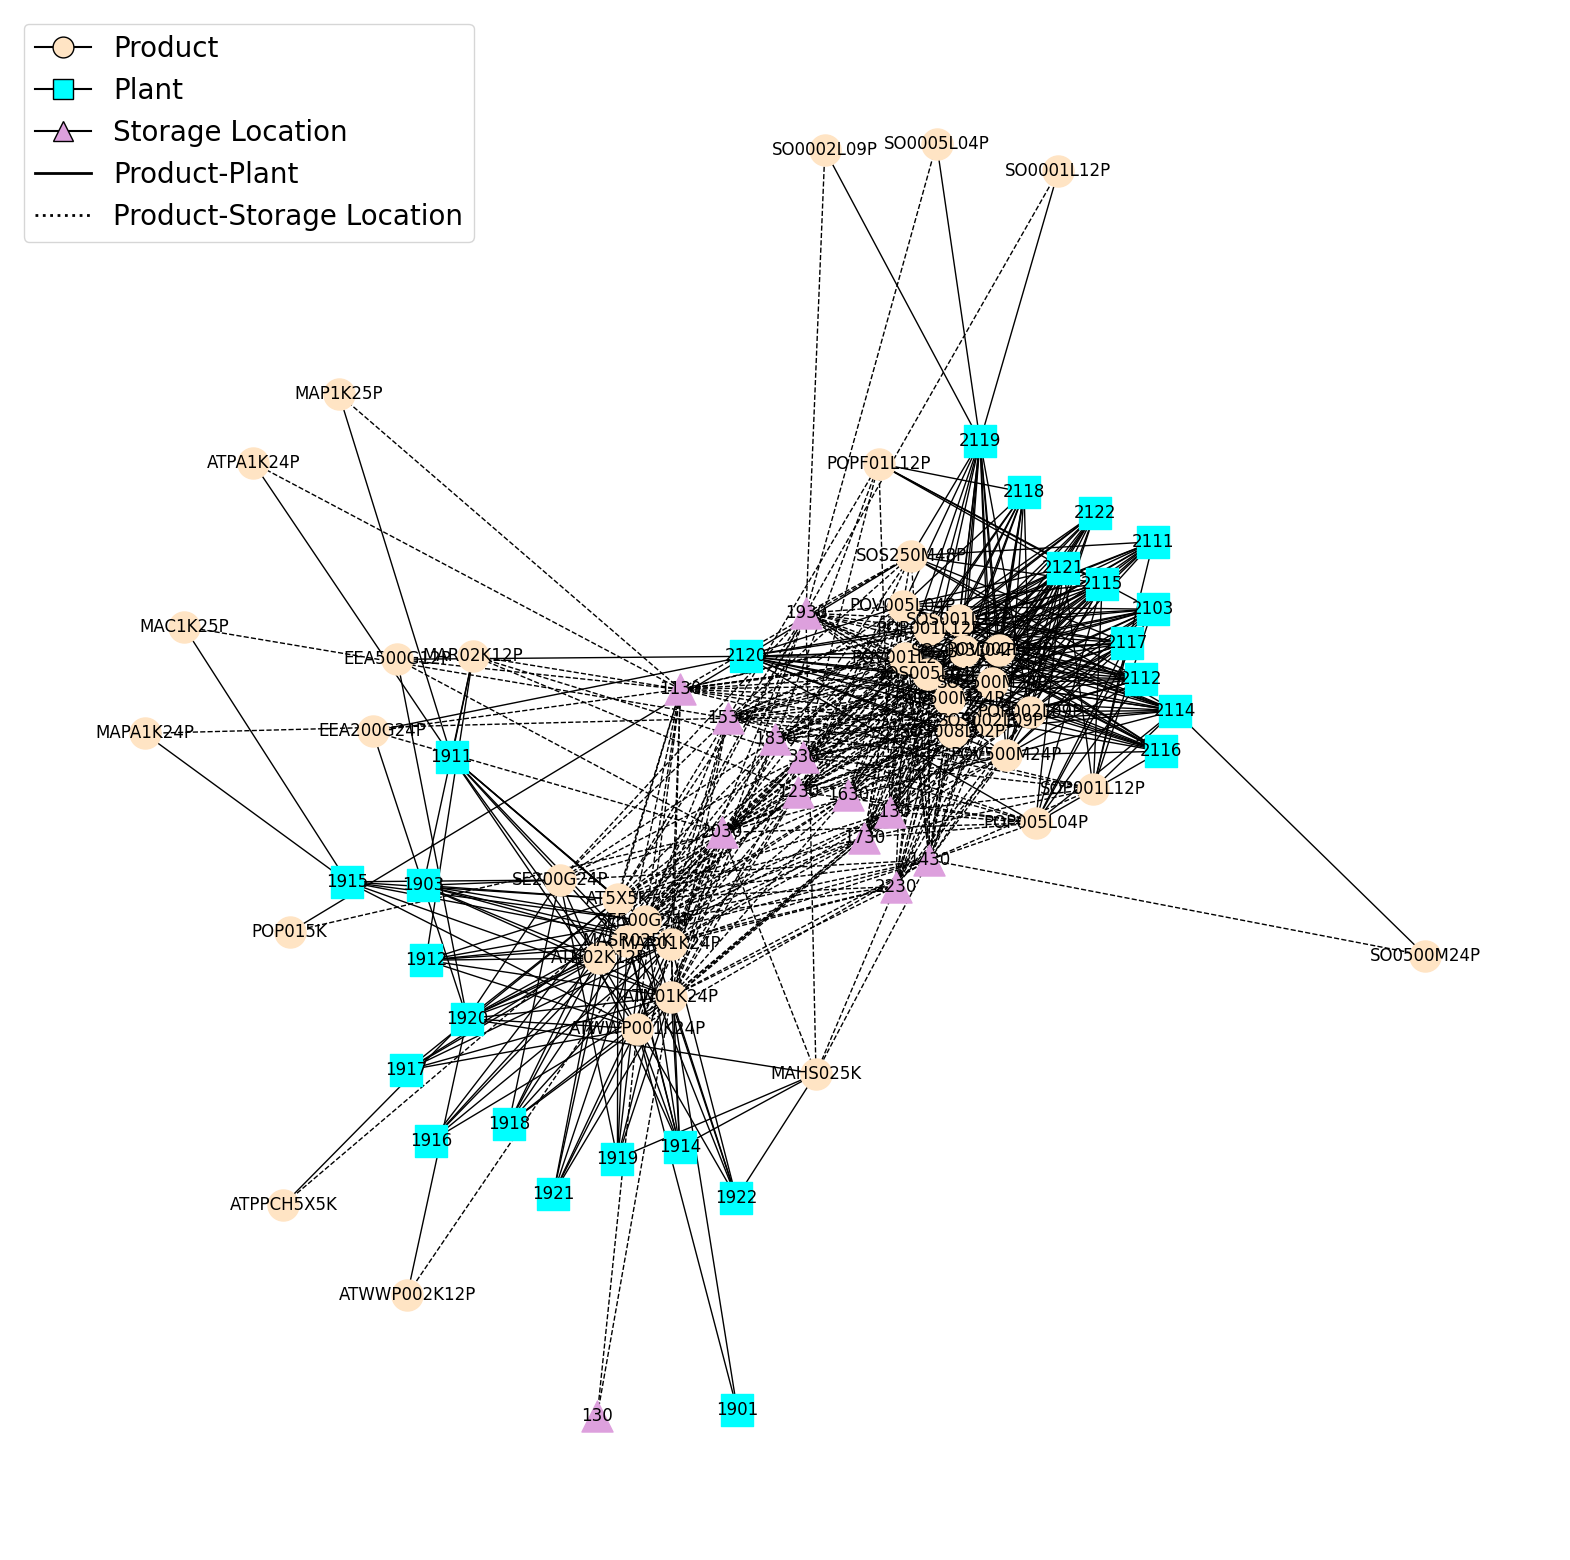

In [6]:
# Position the nodes using a layout
pos = nx.spring_layout(G)

# Create a 10x10 inch figure
plt.figure(figsize=(20, 20))

# Draw nodes with different shapes
for node_type, shape in node_shapes.items():
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[node for node, attr in G.nodes(data=True) if attr['type'] == node_type],
                           node_shape=shape,
                           node_color=node_colors[node_type],
                           label=node_type,
                           node_size=500)

# Draw edges with different styles
for edge_type, style in edge_styles.items():
    nx.draw_networkx_edges(G, pos,
                           edgelist=[(u, v) for u, v, attr in G.edges(data=True) if attr['type'] == edge_type],
                           style=style)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Create custom node legend handles
node_legend_handles = [plt.Line2D([0], [0], marker='o', color='black', label='Product', markerfacecolor='bisque', markersize=15),
                       plt.Line2D([0], [0], marker='s', color='black', label='Plant', markerfacecolor='cyan', markersize=15),
                       plt.Line2D([0], [0], marker='^', color='black', label='Storage Location', markerfacecolor='plum', markersize=15)]

# Create custom edge legend handles
edge_legend_handles = [plt.Line2D([0], [0], color='black', lw=2, linestyle='-',  label='Product-Plant'),
                       plt.Line2D([0], [0], color='black', lw=2, linestyle=':', label='Product-Storage Location')]

# Add the legends
plt.legend(handles=node_legend_handles + edge_legend_handles, fontsize=20, loc='upper left')

# Increase tick params font size
plt.tick_params(axis='both', which='major', labelsize=10)

# Show plot
plt.axis('off')
plt.show()


In [7]:

# Initialize a hypergraph
H = nx.Graph()

# Add nodes to the hypergraph with type attributes
for column in df.columns:
    for node in df[column].unique():
        H.add_node(node)  # Assign 'type' attribute here
        nx.set_node_attributes(H, {node: column}, name="type")
        nx.set_node_attributes(H, {node: node}, name="name")

print(H.nodes)

# Add hyperedges to the hypergraph
for _, row in df.iterrows():
    hyperedge = tuple(row)
    H.add_edge('Hyperedge', hyperedge)


['POV002L09P', 'SOS001L12P', 'POP002L09P', 'POP001L12P', 'POV001L24P', 'SOS005L04P', 'POP500M24P', 'ATN01K24P', 'ATN02K12P', 'MAR02K12P', 'MAR01K24P', 'SE500G24P', 'SOS500M24P', 'SOS008L02P', 'POV500M24P', 'AT5X5K', 'SOS002L09P', 'SE200G24P', 'POPF01L12P', 'ATWWP001K24P', 'POP005L04P', 'SOS250M48P', 'SOS003L04P', 'POV005L04P', 'MAHS025K', 'SOP001L12P', 'MASR025K', 'POP015K', 'SO0005L04P', 'SO0002L09P', 'SO0001L12P', 'SO0500M24P', 'ATWWP002K12P', 'ATPPCH5X5K', 'ATPA1K24P', 'MAPA1K24P', 'MAP1K25P', 'MAC1K25P', 'EEA500G12P', 'EEA200G24P', np.int64(2120), np.int64(1920), np.int64(1911), np.int64(2111), np.int64(1921), np.int64(2121), np.int64(1917), np.int64(2117), np.int64(2114), np.int64(2119), np.int64(1916), np.int64(2116), np.int64(1918), np.int64(2118), np.int64(2112), np.int64(1919), np.int64(1915), np.int64(2115), np.int64(1912), np.int64(2103), np.int64(1922), np.int64(2122), np.int64(1914), np.int64(1903), np.int64(1901), np.int64(2030), np.int64(1130), np.int64(2130), np.int64(1

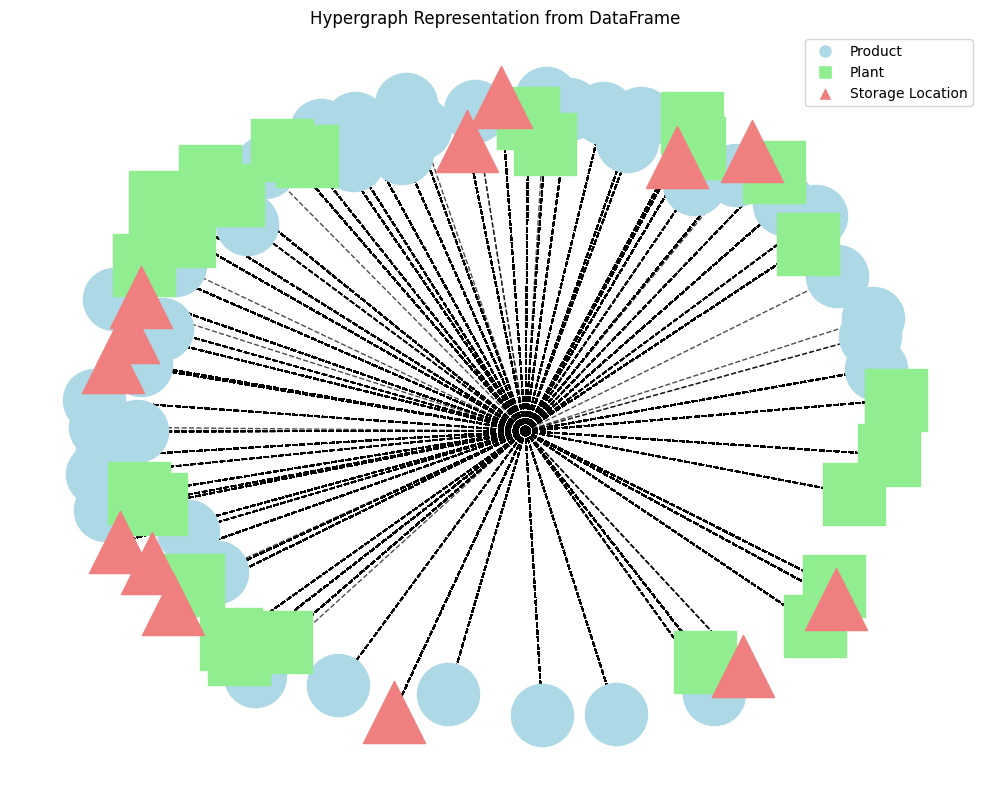

In [8]:
# Draw the hypergraph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(H)

# Draw nodes with different markers and colors based on type
node_types = {'Product': 'o', 'Plant': 's', 'Storage Location': '^'}
node_colors = {'Product': 'lightblue', 'Plant': 'lightgreen', 'Storage Location': 'lightcoral'}

for node_type, marker in node_types.items():
    nodes = [node for node, attr in H.nodes(data=True) if attr.get('type') == node_type]
    nx.draw_networkx_nodes(H, pos, nodelist=nodes, node_shape=marker, node_color=node_colors[node_type], label=node_type, node_size=2000)

# Draw hyperedges (as dashed lines between nodes)
for he_id, _ in enumerate(df.iterrows()):
    hyperedge = tuple(df.iloc[he_id])
    nx.draw_networkx_edges(H, pos, edgelist=[('Hyperedge', node) for node in hyperedge], style='dashed', alpha=0.7)

# Add legend for node types
node_legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Product', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='s', color='w', label='Plant', markerfacecolor='lightgreen', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', label='Storage Location', markerfacecolor='lightcoral', markersize=10)
]
plt.legend(handles=node_legend_handles, loc='upper right')

plt.title('Hypergraph Representation from DataFrame')
plt.tight_layout()
plt.axis('off')
plt.show()